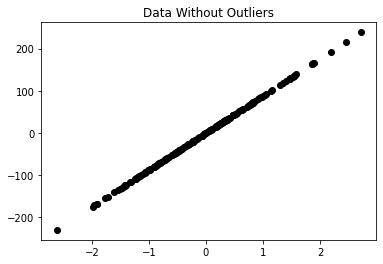

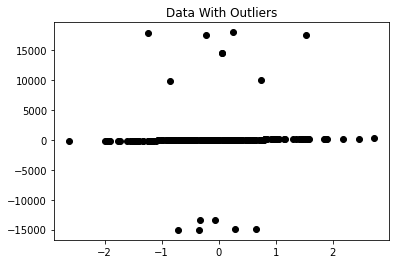

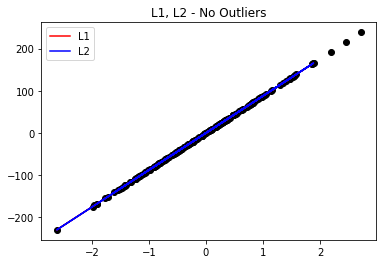

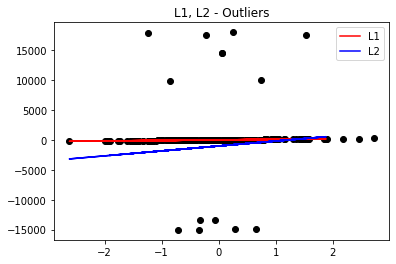

In [63]:
# import libs
import random
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sklearn lib used to generate linear data
# random state used for replicability
X, y = make_regression(n_samples=200, n_features=1, noise=0, random_state=42)
X_outliers, y_outliers = make_regression(n_samples=200, n_features=1, noise=0, random_state=42)
data = pd.DataFrame(data=np.array([X.reshape(200), y]).T)
data_outliers = pd.DataFrame(data=np.array([X_outliers.reshape(200), y_outliers]).T)

# add outliers manually
y_outliers[10] += 10000
y_outliers[20] -= 15000
y_outliers[35] += 17500
y_outliers[40] -= 15000
y_outliers[75] += 14500
y_outliers[80] -= 13400
y_outliers[90] += 18000
y_outliers[14] += 10000
y_outliers[26] -= 15000
y_outliers[68] += 17500
y_outliers[150] -= 15000
y_outliers[129] += 14500
y_outliers[103] -= 13400
y_outliers[172] += 18000

# plot both sets of data
plt.scatter(X, y, color='black')
plt.title('Data Without Outliers')
plt.show()

plt.scatter(X_outliers, y_outliers, color='black')
plt.title('Data With Outliers')
plt.show()

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)

# function for L1 loss
# will compute loss with respect to both w0 and w1
def L1(xi, yi, w0, w1):
    l1w0 = ((w0+w1*xi-yi)/abs(w0+w1*xi-yi))
    l1w1 = ((xi*(w0+w1*xi-yi))/abs(w0+w1*xi-yi))
    return l1w0, l1w1

# function for L2 loss
# will compute loss with respect to both w0 and w1
def L2(xi, yi, w0, w1):
    l2w0 = 2*(w0+w1*xi-yi)
    l2w1 = 2*xi*(w0+w1*xi-yi)
    return l2w0, l2w1

# function for stochastic gradient descent
# this does not use batches - just one data point every time
# will work for both L1 and L2 loss depending on what loss function is passed
# use the training data here
def sgd(loss_function, X, y, n=0.05, epochs=10000):
    w0, w1 = 0, 0 #initialize weights at 0

    for _ in range(epochs):

        # grab a random data point
        datapoint = random.randint(0, 159)
        X_tmp = X[datapoint]
        y_tmp = y[datapoint]

        # compute the loss with the specified loss function
        lw0, lw1 = loss_function(X_tmp, y_tmp, w0, w1)

        # update the weights
        w0 = w0 - n*lw0
        w1 = w1 - n*lw1
    
    return w0, w1

# L1, L2 losses for data without outliers
# use training data
l1w0, l1w1 = sgd(L1, X_train, y_train)
l2w0, l2w1 = sgd(L2, X_train, y_train)

# L1, L2 losses for data with outliers
# use training data
l1w0_out, l1w1_out = sgd(L1, X_train_outliers, y_train_outliers)
l2w0_out, l2w1_out = sgd(L2, X_train_outliers, y_train_outliers)

# use the test data to gather coordinates for L1 and L2
def train():
    l1_loss = []
    l2_loss = []
    l1_loss_outliers = []
    l2_loss_outliers = []

    for i in range(40):
        l1_loss.append([X_test[i], (l1w0+l1w1*X_test[i])])
        l2_loss.append([X_test[i], (l2w0+l2w1*X_test[i])])
        l1_loss_outliers.append([X_test_outliers[i], (l1w0_out+l1w1_out*X_test_outliers[i])])
        l2_loss_outliers.append([X_test_outliers[i], (l2w0_out+l2w1_out*X_test_outliers[i])])
    
    return l1_loss, l2_loss, l1_loss_outliers, l2_loss_outliers

l1_loss, l2_loss, l1_loss_outliers, l2_loss_outliers = train()

# plot the data and loss functions before and after outliers are added
plt.scatter(X, y, color='black')
plt.plot(np.array(l1_loss)[:, 0], np.array(l1_loss)[:, 1], color='red', label='L1')
plt.plot(np.array(l2_loss)[:, 0], np.array(l2_loss)[:, 1], color='blue', label='L2')
plt.title('L1, L2 - No Outliers')
plt.legend()
plt.show()

plt.scatter(X_outliers, y_outliers, color='black')
plt.plot(np.array(l1_loss_outliers)[:, 0], np.array(l1_loss_outliers)[:, 1], color='red', label='L1')
plt.plot(np.array(l2_loss_outliers)[:, 0], np.array(l2_loss_outliers)[:, 1], color='blue', label='L2')
plt.title('L1, L2 - Outliers')
plt.legend()
plt.show()